In [51]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
%aimport exv2.experiment_results 

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import Markdown

pd.set_option('display.max_columns', None)

In [53]:
MANUAL="mock_data/2024-*"
exr = exv2.experiment_results.ExperimentResults(MANUAL)

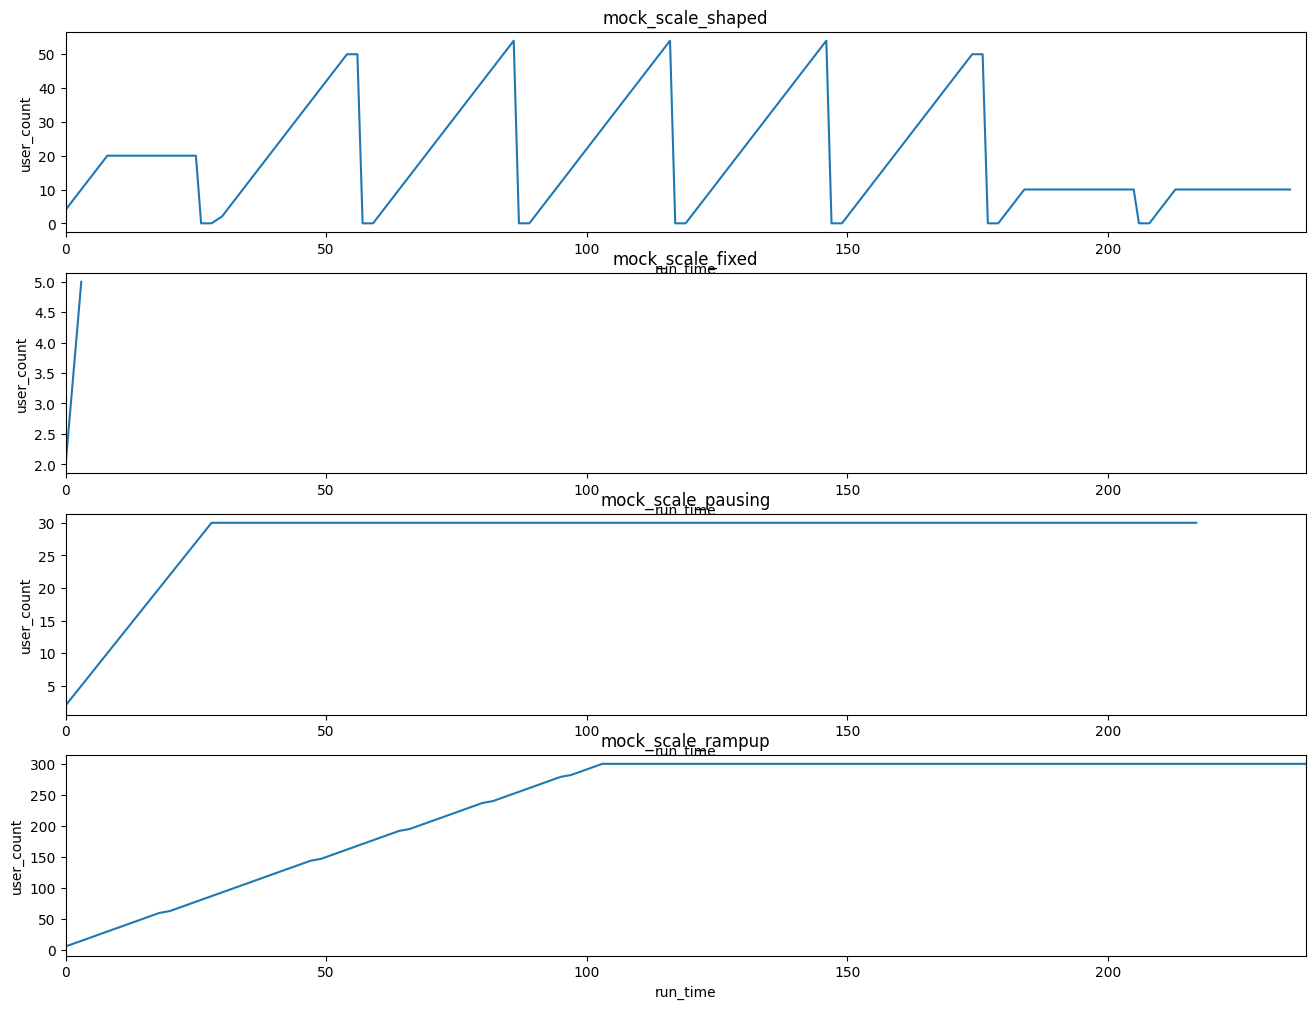

In [54]:
hist = exr.stats_history.groupby(["exp_branch","exp_workload","run_iteration","run_time"])[["user_count"]].min()
hist = hist.reset_index()
hist["exp_workload"].unique()
max_runtime = hist["run_time"].max()

fig = plt.figure(figsize=(16,12))
gs = GridSpec(exr.stats_history["exp_workload"].nunique(), 1, figure=fig)

for i, w in enumerate(exr.stats_history["exp_workload"].unique()):
    ax = fig.add_subplot(gs[i, 0])
    sns.lineplot(data=hist[(hist["exp_workload"] == w)], x="run_time",y="user_count",ax=ax, legend=None)
    ax.set_title(w)
    ax.set_xlim(0,max_runtime )


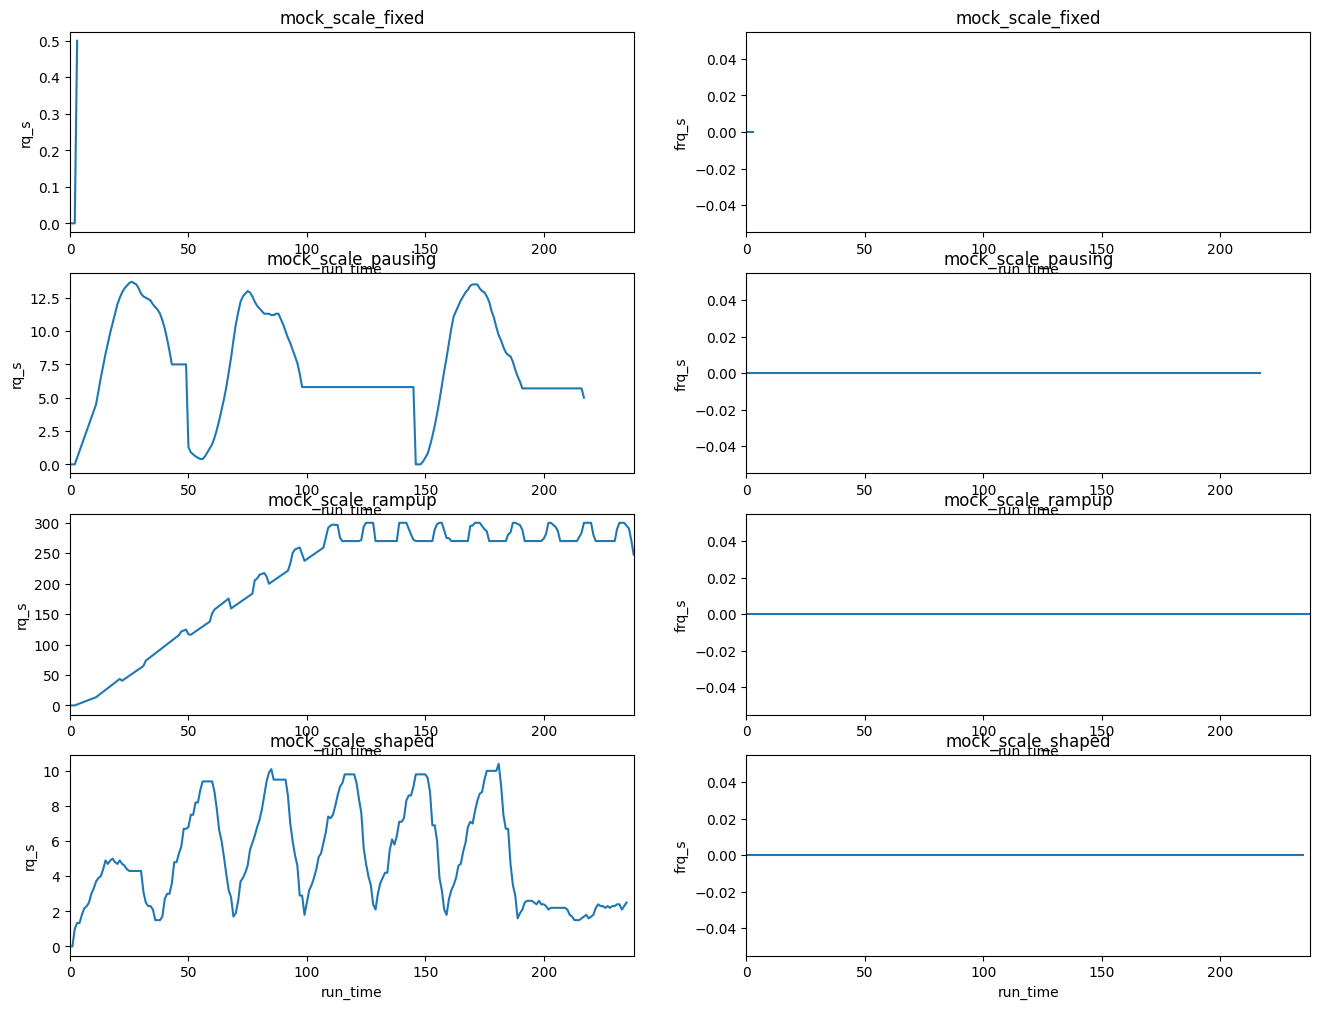

In [55]:
fig = plt.figure(figsize=(16,12))

gs = GridSpec(exr.stats_history["exp_workload"].nunique(), 2, figure=fig)

hist = exr.stats_history.groupby(["exp_branch","exp_workload","run_iteration","run_time"])[["rq_s","frq_s"]].sum()
hist.reset_index(inplace=True)
max_runtime = hist["run_time"].max()
for i, w in enumerate(hist["exp_workload"].unique()):
    ax = fig.add_subplot(gs[i, 0])
    sns.lineplot(data=hist[(hist["exp_workload"] == w)], x="run_time",y="rq_s", hue="exp_branch",ax=ax, legend=None)
    ax.set_title(w)
    ax.set_xlim(0,max_runtime )

    ax = fig.add_subplot(gs[i, 1])
    sns.lineplot(data=hist[(hist["exp_workload"] == w)], x="run_time",y="frq_s", hue="exp_branch",ax=ax, legend=None)
    ax.set_title(w)
    ax.set_xlim(0,max_runtime )

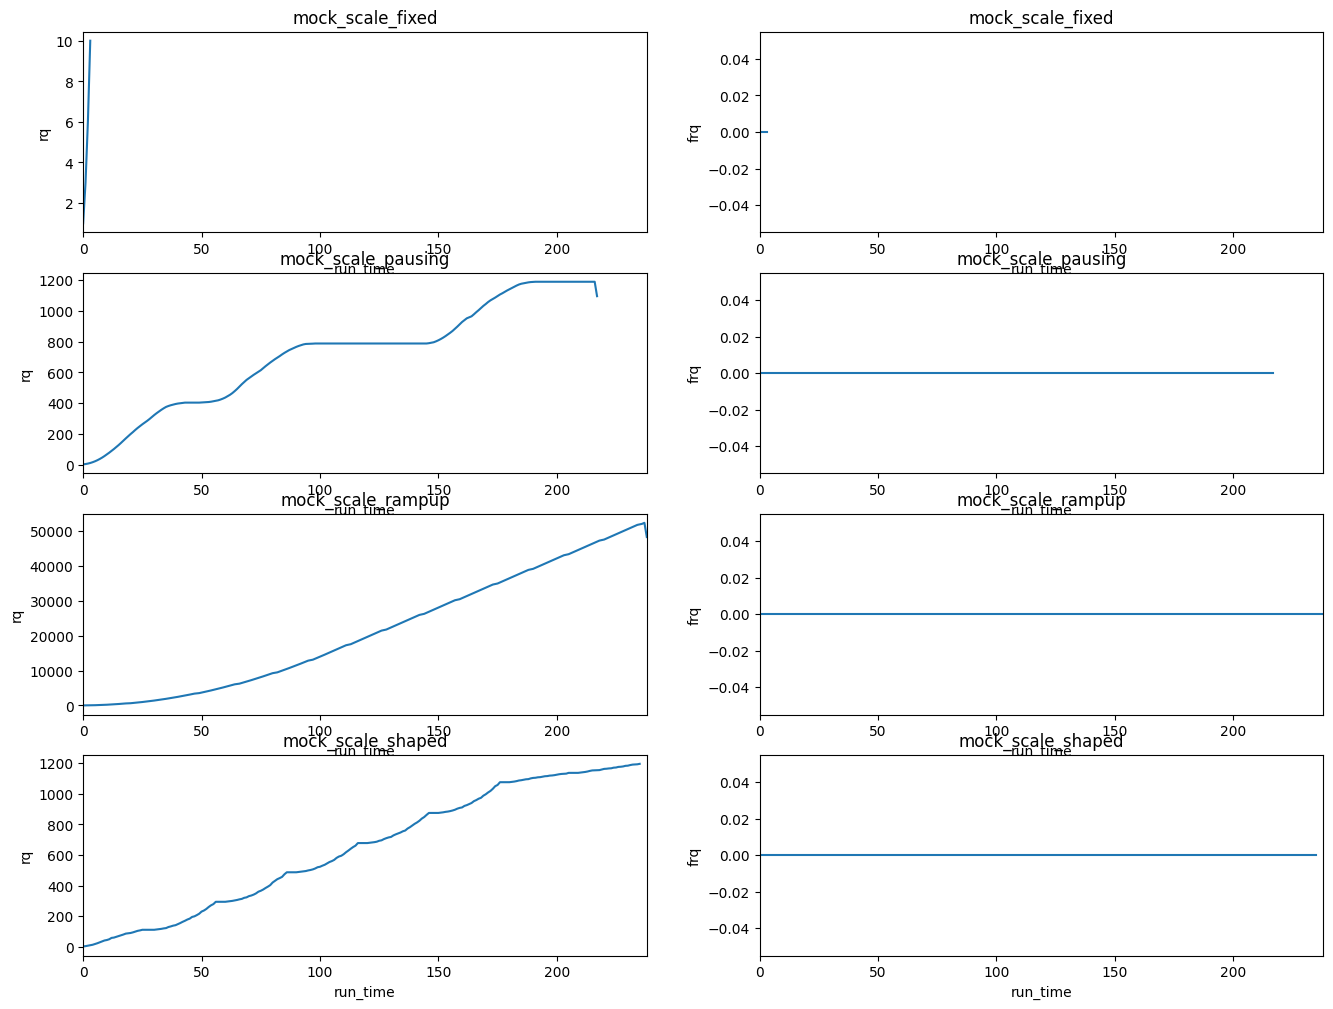

In [56]:
fig = plt.figure(figsize=(16,12))

gs = GridSpec(exr.stats_history["exp_workload"].nunique(), 2, figure=fig)

hist = exr.stats_history.groupby(["exp_branch","exp_workload","run_iteration","run_time"])[["rq","frq"]].sum()
hist.reset_index(inplace=True)
max_runtime = hist["run_time"].max()
for i, w in enumerate(hist["exp_workload"].unique()):
    ax = fig.add_subplot(gs[i, 0])
    sns.lineplot(data=hist[(hist["exp_workload"] == w)], x="run_time",y="rq", hue="exp_branch",ax=ax, legend=None)
    ax.set_title(w)
    ax.set_xlim(0,max_runtime )

    ax = fig.add_subplot(gs[i, 1])
    sns.lineplot(data=hist[(hist["exp_workload"] == w)], x="run_time",y="frq", hue="exp_branch",ax=ax, legend=None)
    ax.set_title(w)
    ax.set_xlim(0,max_runtime )